In [1]:
from mypgm.base import RandomVar, CPD, Factor
from mypgm.pgms import BayesianNetwork

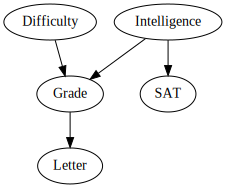

In [2]:
D = RandomVar('Difficulty', 2)
I = RandomVar('Intelligence', 2)
G = RandomVar('Grade', 3)
L = RandomVar('Letter', 2)
S = RandomVar('SAT', 2)


cpd_d = CPD([D], values=[0.6, 0.4])
cpd_i = CPD([I], values=[0.7, 0.3])
cpd_g = CPD([G, I, D], values=[0.3, 0.05, 0.9,  0.5,
                               0.4, 0.25, 0.08, 0.3,
                               0.3, 0.7,  0.02, 0.2])

cpd_l = CPD([L, G], values=[0.1, 0.4, 0.99,
                            0.9, 0.6, 0.01])

cpd_s = CPD([S, I], values=[0.95, 0.2,
                            0.05, 0.8])

bn3 = BayesianNetwork([cpd_d, cpd_i, cpd_g, cpd_l, cpd_s])
bn3.viz()

In [2]:
from mypgm.exacted import VariableElimination  
from mypgm.approximated import GibbsSampler, MarkovRF, gaussian_proposal

#initialize the method
ve = VariableElimination(bn3)

#marginal query on G
print('Posterior for:', ve.marginal([G]))
#marginal query on G given an evidence on D and I
print('Posterior for:', ve.marginal([G], [(D, 0), (I, 1)]))
#map query on L, G, S
print('Maximum a posteriori:', ve.map_query([(D, 0), (I, 1)]))
#map query on G
print('Maximum a posteriori:', ve.map_query([(D, 0), (I, 1), (L, 1), (S, 1)]))


gs = GibbsSampler(bn3, metropolis=True, proposal=gaussian_proposal, delta=0.8)
gs.sample(burn_in=1000, n=2500, plot=[G], print_posterior=[G])


gs.reset()
gs.sample(burn_in=1000, n=1500, evidence=[(D, 0), (I, 1)], print_posterior=[G])

NameError: name 'bn3' is not defined

In [3]:
mrf3=bn3.to_markov_model()
iters, converged = mrf3.lbp(normalize=True)
print('LBP ran for %d iterations. Converged = %r' % (iters, converged))

# Print out the final marginals
mrf3.print_rv_marginals()

LBP ran for 3 iterations. Converged = True
Marginals for RVs (normalized):
Difficulty
	 0 	 0.6
	 1 	 0.4
Intelligence
	 0 	 0.7
	 1 	 0.3
Grade
	 0 	 0.36200000000000004
	 1 	 0.28839999999999993
	 2 	 0.34959999999999997
Letter
	 0 	 0.49766399999999994
	 1 	 0.502336
SAT
	 0 	 0.725
	 1 	 0.275
